<h1 align="center"><strong>Transformada de Hough</strong></h1>

**1.¿Qué es y para que sirve la Transformada de Hough?**

Es una técnica utilizada para detectar figuras en una imagen digital que pueden ser expresadas matemáticamente, tales como rectas, círculos o elipses.

[Reference](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_04b_hough_transform/hough_transform.ipynb)

In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os

figsize = (10, 10)
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap08_Segmentacion\imagenes")

## Import an image


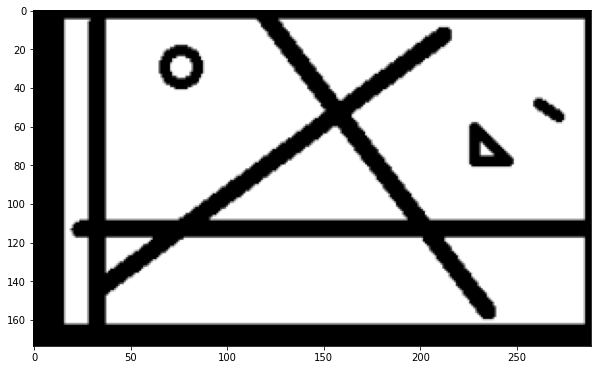

In [7]:
im3 = cv2.imread("edge_bold.png")
im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()

## Detección de Bordes usando Canny
For more details about Canny edge detection, look at lecture 3


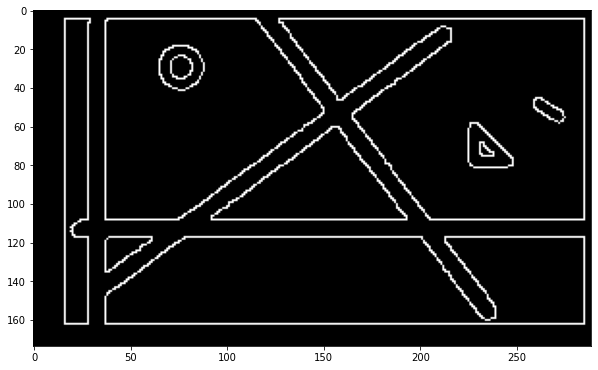

In [10]:
mag_im = cv2.Canny(im, 50, 400) # Imagen binaria

plt.figure(figsize=figsize)
plt.imshow(mag_im,cmap = 'gray')
plt.show()

## Inicializamos la matriz  de acumulación(H)


Creamos un arreglo H bidimensional donde cada elemento de H está relacionado a una pareja de coordenadas $(\rho  , \theta)$.

Inicialmente se tiene $ H(\rho  , \theta) = 0 $

In [22]:
# choose p(or r) size
r_step = 1
rmax = np.sqrt(im.shape[0] ** 2 + im.shape[1] ** 2)
r_vec = np.arange(-rmax, rmax, r_step)

# choose theta size
t_step = np.pi / 180
t_vec = np.arange(0, np.pi, t_step)

# accumulation matrix
acc_mat = np.zeros((r_vec.shape[0], t_vec.shape[0])) # H(p,theta)

## Llenando la matriz de acumulación

Para cada punto que se encuentre dentro de los bordes de la imagen($\rho_{i} = (x_{i},y_{i})$), vamos a incrementar el valor de H en cada pareja de coordenadas  $(\rho  , \theta)$ , que se encuentre en la curva paramétrica asociada al punto $\rho_{i}$.

$ H(\rho  , \theta) = H(\rho  , \theta) + 1 $

$ \forall \rho = x_{i} \times cos(\theta) + y_{i} \times sen(\theta) $

In [24]:
# get indices of edges
edge_inds = np.argwhere(mag_im > 0) # Indices que pertenecen a los bordes

# run on all theta and edge indices and find corresponding R
for t_ind, t0 in enumerate(t_vec):
    for yx in edge_inds:
        x = yx[1]
        y = yx[0]

        r0 = x * np.cos(t0) + y * np.sin(t0) # Valor de p en esta iteracion
        r_ind = np.argmin(np.abs(r0 - r_vec)) # Hallando el indice

        acc_mat[r_ind, t_ind] += 1

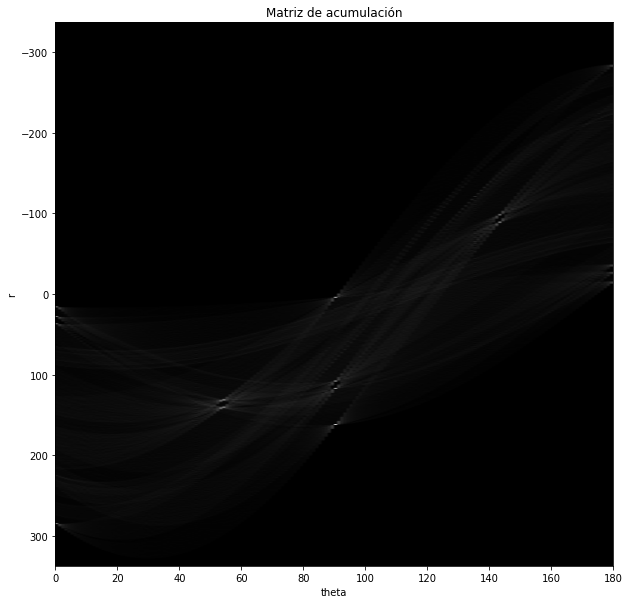

In [43]:
plt.figure(figsize=figsize)
plt.imshow(acc_mat, extent=[0, 180, rmax, -rmax], aspect="auto", cmap = "gray")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("Matriz de acumulación")
plt.show()

La curva anterior contiene todas las combinaciones posibles de $\rho  , \theta $ que corresponden al punto en cuestión.

Bajo este procedimiento se puede determinar que recta $(\rho  , \theta)$ es la que recibe más votos por los bordes de la imagen.


## Threshold accumulation matrix


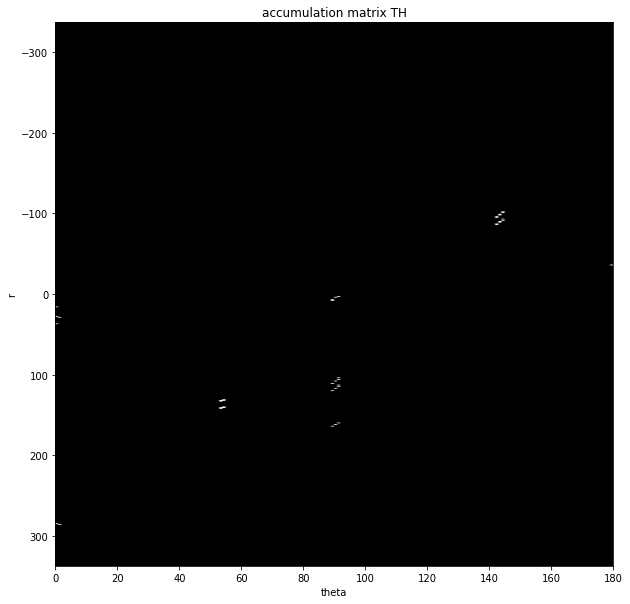

In [69]:
TH = 120
acc_mat_th = acc_mat > TH

plt.figure(figsize=figsize)
plt.imshow(acc_mat_th, extent=[0, 180, rmax, -rmax], aspect="auto", cmap = "gray")
plt.xlabel("theta")
plt.ylabel("r")
plt.title("accumulation matrix TH")
plt.show()

Cada par $(\rho  , \theta)$ resaltado en el gráfico anterior representa una recta en el plano xy.

## Dibujando líneas encontradas por Hough


(rho,theta): (-102.33810932060436, 144.0)
(rho,theta): (-101.33810932060436, 144.0)
(rho,theta): (-99.33810932060436, 143.0)
(rho,theta): (-98.33810932060436, 143.0)
(rho,theta): (-96.33810932060436, 142.0)
(rho,theta): (-95.33810932060436, 142.0)
(rho,theta): (-93.33810932060436, 144.0)
(rho,theta): (-91.33810932060436, 144.0)
(rho,theta): (-90.33810932060436, 143.0)
(rho,theta): (-89.33810932060436, 143.0)
(rho,theta): (-87.33810932060436, 142.0)
(rho,theta): (-86.33810932060436, 142.0)
(rho,theta): (-36.33810932060436, 179.0)
(rho,theta): (2.66189067939564, 91.0)
(rho,theta): (3.66189067939564, 90.0)
(rho,theta): (6.66189067939564, 89.0)
(rho,theta): (7.66189067939564, 89.0)
(rho,theta): (15.66189067939564, 0.0)
(rho,theta): (27.66189067939564, 0.0)
(rho,theta): (28.66189067939564, 1.0)
(rho,theta): (36.66189067939564, 0.0)
(rho,theta): (103.66189067939564, 91.0)
(rho,theta): (105.66189067939564, 91.0)
(rho,theta): (107.66189067939564, 90.0)
(rho,theta): (110.66189067939564, 89.0)
(

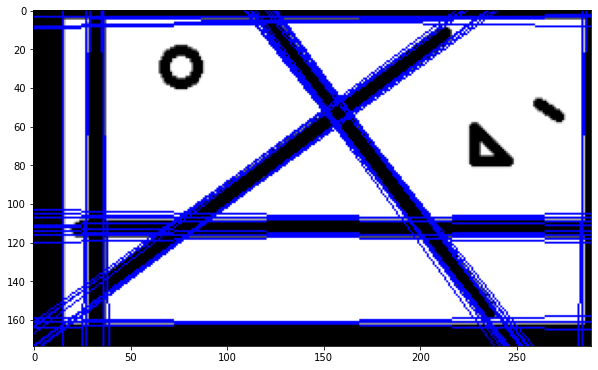

In [70]:
# get indices of acc_mat_th
edge_inds = np.argwhere(acc_mat_th > 0)

res = im3.copy()
for r_ind, t_ind in edge_inds:
    rho = r_vec[r_ind]
    theta = t_vec[t_ind]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()

## Try cv2.HoughLines
This implementation is faster since it was done in C


(rho,theta): (162.0, 90.00000250447816)
(rho,theta): (4.0, 90.00000250447816)
(rho,theta): (117.0, 90.00000250447816)
(rho,theta): (108.0, 90.00000250447816)
(rho,theta): (16.0, 0.0)
(rho,theta): (285.0, 0.0)
(rho,theta): (28.0, 0.0)
(rho,theta): (131.0, 53.99999808759232)
(rho,theta): (140.0, 53.99999808759232)
(rho,theta): (-99.0, 142.9999960107835)
(rho,theta): (37.0, 0.0)
(rho,theta): (-90.0, 142.9999960107835)


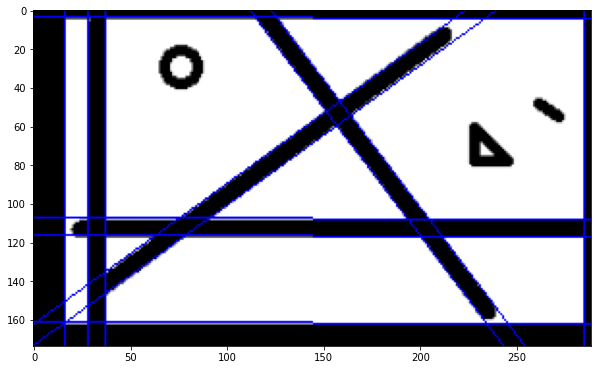

In [71]:
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    print("(rho,theta): " + str((rho, theta / np.pi * 180)))

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=1)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()

## Ejemplo
We can see on the bottom horizontal lines that the "noise" of the tree top edges is interfeering with the line detection.


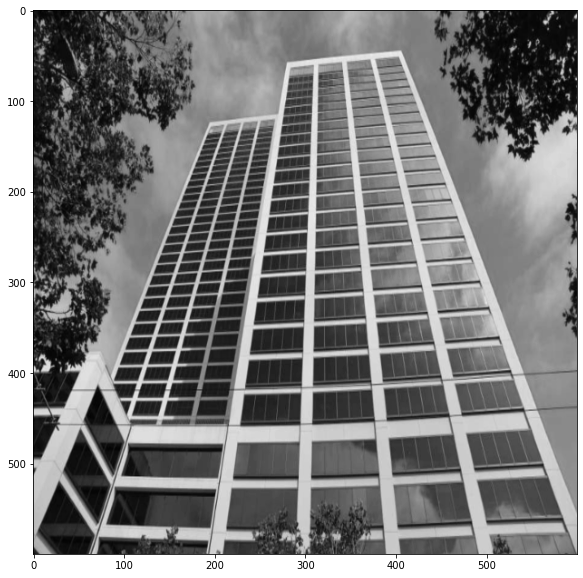

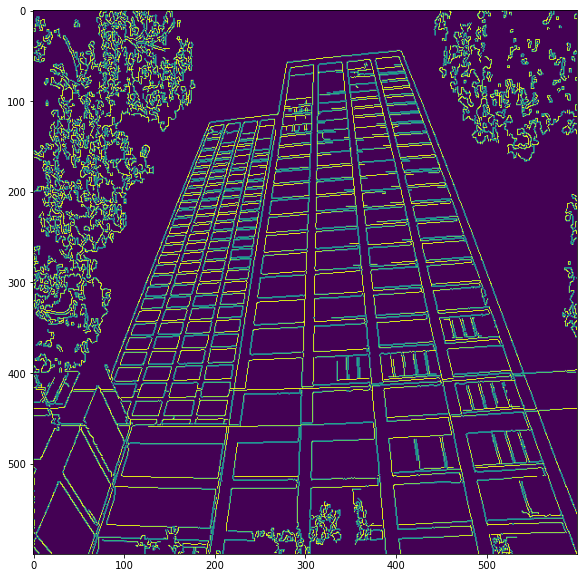

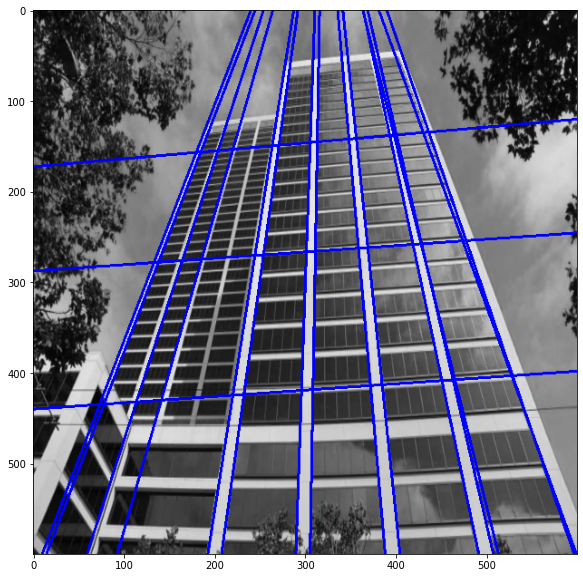

In [72]:
im3 = cv2.imread("building.png")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im3 = cv2.resize(im3,(600,600))

im = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=255)
plt.show()

mag_im = cv2.Canny(im, 50, 400)

plt.figure(figsize=figsize)
plt.imshow(mag_im)
plt.show()

TH = 200
lines = cv2.HoughLines(mag_im, r_step, t_step, TH)
res = im3.copy()

for r_t in lines:
    rho = r_t[0, 0]
    theta = r_t[0, 1]

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    res = cv2.line(res, (x1, y1), (x2, y2), (0, 0, 255), thickness=2)

plt.figure(figsize=figsize)
plt.imshow(res)
plt.show()

